# Homework 1

### Dataset 1: CSV

I've imported two data sets of baseball players information and their batting statistics. The datasets merge on playerID. We will look at Number of RBIs of the Houston Astros and the number of Homeruns by Height.

In [107]:
import numpy as np      ## Library with linear algebra functions/matrix analysis 
import matplotlib.pyplot as plt   ## Library with graph and other plotting functions
import pandas as pd     ## Library with data set visualization and analysis functions
import seaborn         ## Library helping your visualizations look better

In [108]:
batting = pd.read_csv('Batting_Players.csv')
players = pd.read_csv('People.csv')

## Basic Pandas Operations

In [109]:
## Import Data Set as a Pandas DataFrame
batting['playerID'] = batting['playerID'].astype(str)

players['playerID'] = players['playerID'].astype(str)
type(batting)

print(f'Batting Dimensions: ', batting.shape)
print(f'Players Dimensions: ', players.shape)

Batting Dimensions:  (25060, 22)
Players Dimensions:  (19370, 24)


In [40]:
#There are many missing values in the players file
print(players.isnull().sum())
print(batting.isnull().sum())

playerID           0
birthYear        126
birthMonth       290
birthDay         435
birthCountry      68
birthState       524
birthCity        179
deathYear       9820
deathMonth      9821
deathDay        9822
deathCountry    9825
deathState      9871
deathCity       9830
nameFirst         38
nameLast           0
nameGiven         38
weight           837
height           755
bats            1185
throws           979
debut            196
finalGame        196
retroID           56
bbrefID            1
dtype: int64
playerID    0
yearID      0
stint       0
teamID      0
lgID        0
G           0
AB          0
R           0
H           0
2B          0
3B          0
HR          0
RBI         0
SB          0
CS          0
BB          0
SO          0
IBB         0
HBP         0
SH          0
SF          0
GIDP        0
dtype: int64


In [116]:
## Unique Columns
print(f'Batting Columns Names: ', batting.columns)
print(f'Players Column Names: ', players.columns)
## Unique values in Columns

#Notice the data set is from 2000-2017
print(batting['yearID'].unique())

print(players['height'].unique())
#print(players['height'].isnull())

Batting Columns Names:  Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')
Players Column Names:  Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017]
[75. 72. 73. 71. 68. 70. 78. 74. 76. 69. nan 77. 66. 67. 80. 65. 79. 64.
 82. 81. 63. 43. 83.]


In [287]:
## Adding Columns together 
batting_add = batting
batting_add.loc[:,'Vals'] = batting1.loc[:,'BB'] + batting1.loc[:,'RBI']
batting_add.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Vals
0,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,2,1,21,38,1,2,2,1,2,50
1,abbotku01,2000,1,NYN,NL,79,157,22,34,7,...,1,1,14,51,2,1,0,1,2,26
2,abbotpa01,2000,1,SEA,AL,35,5,1,2,1,...,0,0,0,1,0,0,1,0,0,0
3,abreubo01,2000,1,PHI,NL,154,576,103,182,42,...,28,8,100,116,9,1,0,3,12,179
4,aceveju01,2000,1,MIL,NL,62,1,1,0,0,...,0,0,1,1,0,0,0,0,0,1


In [288]:

batting
batting1 = batting.merge(players, how="left")
batting1.loc[:5, ('nameFirst', 'playerID', 'teamID', 'birthYear')].sort_values(ascending=True, by="birthYear")

,nameFirst,playerID,teamID,birthYear
2,Paul,abbotpa01,SEA,1967.0
1,Kurt,abbotku01,NYN,1969.0
4,Juan,aceveju01,MIL,1970.0
0,Jeff,abbotje01,CHA,1972.0
5,Terry,adamste01,LAN,1973.0
3,Bobby,abreubo01,PHI,1974.0


### CSV Question 1:
Who is the best player on the Astros in the last 5 years by HR?

In [289]:
#Subset from 2015
batting_2015 = batting[batting.yearID >= 2015].sort_values(by='yearID',ascending=False).reset_index()
#players_age = players[players.birthYear >= 1993].sort_values(by='birthYear',ascending=False).reset_index()

In [290]:
batting_yr_hou = batting_2015[batting_2015.teamID == 'HOU']
batting2 = batting_yr_hou.loc[:, ('playerID', 'R', 'RBI', 'HR')]
#batting_yr_hou.columns
batting2 = batting2.groupby(['playerID']).sum().sort_values(ascending=False, by="R")
batting3 = batting2[(batting2.R > 10) & (batting2.RBI > 10)]

In [291]:
#Create 
batting3.head(5)
#Subset Players df with players names
player_names = players.loc[:, ('playerID', 'nameFirst', 'nameLast', 'height', 'weight')]

batting4 = batting3.reset_index()
batting4
batting_merge = batting4.merge(player_names, left_on="playerID", right_on="playerID")

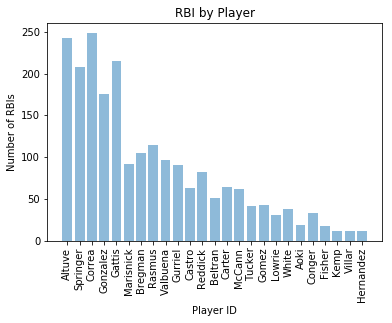

In [292]:


objects = batting_merge.nameLast
y_pos = np.arange(len(batting3))
performance = batting3.RBI
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Number of RBIs')
plt.xlabel('Player ID')
plt.title('RBI by Player')
 
plt.show()

#### Carlos Correa is the player with the most RBIs in the past 5 years 


### CSV Question 2: 
Of the Astros players, Is height and correlated with the number of homeruns? 

In [284]:
#Get height in order
hght = batting_merge.height.sort_values()
hght
#batting_all.loc[:5, ("playerID", "nameFirst", 'HR')].groupby('HR').sum()

0     66.0
22    66.0
19    69.0
8     70.0
18    71.0
17    72.0
15    72.0
6     72.0
9     72.0
23    73.0
12    73.0
3     73.0
11    74.0
7     74.0
20    74.0
24    74.0
14    75.0
16    75.0
21    75.0
1     75.0
10    75.0
13    76.0
5     76.0
4     76.0
2     76.0
Name: height, dtype: float64

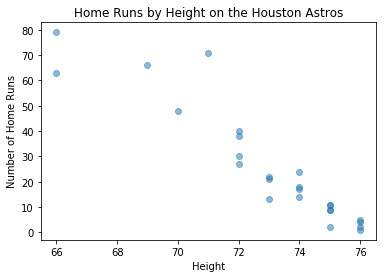

In [285]:
# Plot
plt.scatter(hght, batting_merge.HR, alpha=0.5)
plt.title('Home Runs by Height on the Houston Astros')
plt.xlabel('Height')
plt.ylabel('Number of Home Runs')
plt.show()

#### As a Houston Astros player, we can see that the shorter players have hit more Homeruns in the last 5 years

In [297]:
## Subsetting DataFrame based on column values: 
## Note: Always create separate data frame when subsetting original dataframe.
## Subsets keep original indices, reset indices to make life A LOT EASIER.
batting1 = batting[batting['teamID'] == 'BOS'].reset_index(drop=True)
players1 = players[players['birthYear'] >= 1990].reset_index(drop=True)
players1
'''
Note: sometimes DataFrame object is changed into a DataSeries object. If you are having problems with your code,
change your data object into a DataFrame object like so:
batting1 = pd.DataFrame(batting1)
'''
batting1.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,Vals
0,alcanis01,2000,1,BOS,AL,21,45,9,13,1,...,0,0,3,7,0,0,0,0,0,10
1,alexama02,2000,1,BOS,AL,101,194,30,41,4,...,2,0,13,41,0,0,2,0,0,32
2,arrojro01,2000,2,BOS,AL,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,beckro01,2000,1,BOS,AL,34,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,berryse01,2000,2,BOS,AL,1,4,0,0,0,...,0,0,0,2,0,0,0,0,0,0


### Dataset 2: JSON

#### JSON Question 1:

In [301]:
import json

In [300]:
geo = pd.read_json("https://data.smcgov.org/resource/mb6a-xn89.json")
#Drop column location_1
geo1 = geo.drop(columns=['location_1']).reset_index(drop=True)
print(geo1.shape)
geo1.head(5)

(32, 7)


,bachelor_s_degree_or_higher,geography,geography_type,high_school_graduate,less_than_high_school_graduate,some_college_or_associate_s_degree,year
0,3.5,Atherton,Town,12.3,13.6,2.7,2014-01-01T00:00:00
1,3.6,Belmont,City,5.9,20.9,5.0,2014-01-01T00:00:00
2,3.3,Brisbane,City,1.7,0.0,11.5,2014-01-01T00:00:00
3,2.4,Broadmoor,CDP,8.0,21.2,3.0,2014-01-01T00:00:00
4,3.7,Burlingame,City,8.3,20.1,7.4,2014-01-01T00:00:00


In [326]:
geo2 = geo1.reset_index()
#geo2 = geo2.drop(['index'], axis=1)
geo2.head(5)

,bachelor_s_degree_or_higher,geography,geography_type,high_school_graduate,less_than_high_school_graduate,some_college_or_associate_s_degree,year
0,3.5,Atherton,Town,12.3,13.6,2.7,2014-01-01T00:00:00
1,3.6,Belmont,City,5.9,20.9,5.0,2014-01-01T00:00:00
2,3.3,Brisbane,City,1.7,0.0,11.5,2014-01-01T00:00:00
3,2.4,Broadmoor,CDP,8.0,21.2,3.0,2014-01-01T00:00:00
4,3.7,Burlingame,City,8.3,20.1,7.4,2014-01-01T00:00:00


In [336]:
geo3 = geo2.geography_type.value_counts()
geo_type = pd.DataFrame(geo3)
geo_type

,geography_type
City,15
CDP,12
Town,5


In [341]:
geo_type.geography_type

City    15
CDP     12
Town     5
Name: geography_type, dtype: int64

In [342]:
np.arange(len(geo_type))

array([0, 1, 2])

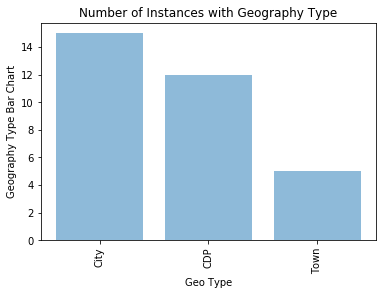

In [346]:
#Create Bar Chart of Geography Types
objects = geo_type.index.tolist()
y_pos = np.arange(len(geo_type))
performance = geo_type.geography_type
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Geography Type Bar Chart')
plt.xlabel('Geo Type')
plt.title('Number of Instances with Geography Type')

plt.show()

## Dataset 3: Webscraper

In [355]:
#Begin to import for webscraping
import requests
from bs4 import BeautifulSoup
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string
import time

In [356]:
#Create a webscraper with beautifulSoup to scrape
letters = list(string.ascii_lowercase)
letters.remove("x")

df = pd.DataFrame()
for letter in letters:
    time.sleep(1)
    scrape_url = "https://www.basketball-reference.com/players/{}/".format(letter)
    r = requests.get(scrape_url)
    soup = BeautifulSoup(r.content, "lxml")
    data = ""
    for tr in soup.find_all("tr"): 
        record = "" 
        for td in tr.find_all(["th", "td"]): 
            record = record + "|" + td.text 
        if len(record)!=0:
            data = data + "\n" + record[1:]
    readable_data = pd.compat.StringIO(data)
    bb = pd.read_table(readable_data, sep="|")
    df = df.append(bb)
basket = df

In [455]:
basket = df

In [456]:
basket.head()

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Years_in_League
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,9
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974","University of Michigan, San Jose State University",5


#### Webscraper Question 1:

Is birth year correlated with the number of years a player is in the league?

In [457]:
#Create a column of Number of Years the players are in the league
basket['Years_in_League'] = basket['To']-basket['From']

In [458]:
basket.sort_values(ascending=False, by='Years_in_League').head(5)

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Years_in_League
272,Kevin Willis,1985,2007,F-C,7-0,220.0,"September 6, 1962",Michigan State University,22
61,Vince Carter,1999,2019,G-F,6-6,220.0,"January 26, 1977",University of North Carolina,20
40,Moses Malone*,1975,1995,C-F,6-10,215.0,"March 23, 1955",NaN,20
34,Kevin Garnett,1996,2016,F-C,6-11,240.0,"May 19, 1976",NaN,20
21,Robert Parish*,1977,1997,C,7-0,230.0,"August 30, 1953",Centenary College of Louisiana,20


In [465]:
#Replace Nan with High School
basket1 = basket


In [466]:
basket1

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges,Years_in_League
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,4
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University,9
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles",19
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University,10
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974","University of Michigan, San Jose State University",5
5,Shareef Abdur-Rahim,1997,2008,F,6-9,225.0,"December 11, 1976",University of California,11
6,Tom Abernethy,1977,1981,F,6-7,220.0,"May 6, 1954",Indiana University,4
7,Forest Able,1957,1957,G,6-3,180.0,"July 27, 1932",Western Kentucky University,0
8,John Abramovic,1947,1948,F,6-3,195.0,"February 9, 1919",Salem International University,1
9,Alex Abrines,2017,2019,G-F,6-6,200.0,"August 1, 1993",NaN,2


In [462]:
#Create a list of Universities in Austin, TX
aust_university = [x for x in basket1['Colleges'].unique() if ('University' in x) & ('Austin' in x)]
aust_university

#Create a list of Universities in Texas
tx_university = [x for x in basket1['Colleges'].unique() if ('University' in x) & ('Texas' in x)]
tx_university

KeyError: 'Colleges'

In [504]:
from datetime import datetime


In [502]:
basket1['bd'] = pd.to_datetime(basket1['Birth Date'], format='%B %d, %Y')
basket1['bd'].astype(str).str[0:4]

0     1968
1     1946
2     1947
3     1969
4     1974
5     1976
6     1954
7     1932
8     1919
9     1993
10    1983
11    1930
12    1962
13    1942
14    1990
15    1954
16    1947
17    1949
18    1984
19    1996
20    1994
21    1963
22    1993
23    1964
24    1997
25    1997
26    1946
27    1986
28    1985
29    1984
      ... 
9     1992
10    1978
11    1961
12    1985
13    1963
14    1985
15    1988
16    1976
17    1998
18    1985
0     1925
1     1930
2     1992
3     1939
4     1947
5     1919
6     1987
7     1990
8     1957
9     1964
10    1977
11    1973
12    1981
13    1996
14    1994
15    1997
16    1953
17    1948
18    1997
19    1919
Name: bd, Length: 4668, dtype: object

array([   0,    1,    2, ..., 4665, 4666, 4667])

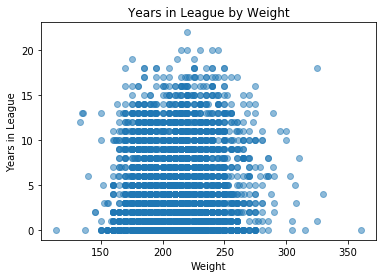

In [510]:
# Years in League by Weight
plt.scatter(basket1.Wt, basket1['Years_in_League'], alpha=0.5)
plt.title('Years in League by Weight')
plt.xlabel('Weight')
plt.ylabel('Years in League')
plt.show()

In [522]:
height_df = basket1.groupby('Ht').mean()
height_df

,From,To,Wt,Years_in_League
Ht,,,,
5-10,1970.500000,1973.229167,169.340426,2.729167
5-11,1974.435484,1977.435484,173.770492,3.000000
5-3,1978.500000,1985.000000,125.000000,6.500000
5-5,1999.000000,2012.000000,135.000000,13.000000
5-6,1966.500000,1972.500000,149.000000,6.000000
5-7,1971.166667,1972.666667,150.833333,1.500000
5-8,1963.666667,1967.333333,165.000000,3.666667
5-9,1970.000000,1972.466667,163.933333,2.466667
6-0,1975.972789,1979.523810,175.891156,3.551020


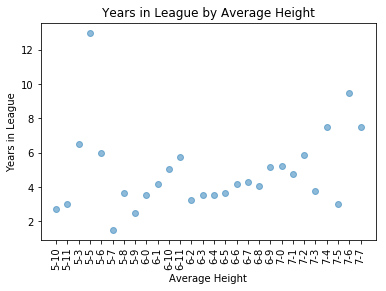

In [527]:
# Years in League by Weight
plt.scatter(height_df.index, height_df['Years_in_League'], alpha=0.5)
plt.title('Years in League by Average Height')
plt.xticks(rotation='vertical')
plt.xlabel('Average Height')
plt.ylabel('Years in League')
plt.show()
#need to reorder x-axis to see 

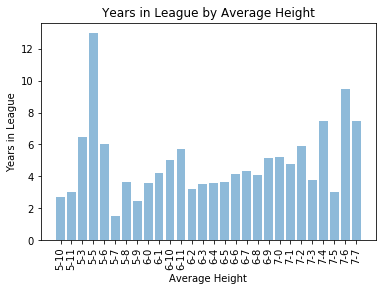

In [528]:
objects = height_df.index.tolist()
y_pos = np.arange(len(height_df))
performance = height_df.Years_in_League
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, rotation='vertical')
plt.ylabel('Years in League')
plt.xlabel('Average Height')
plt.title('Years in League by Average Height')
 
plt.show()

In [531]:
heightlst = height_df.index.tolist()